<a href="https://colab.research.google.com/github/jorgenriquez/Redes-Neuronales-con-Python/blob/main/Neurona_de_McCulloch_y_Pitts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

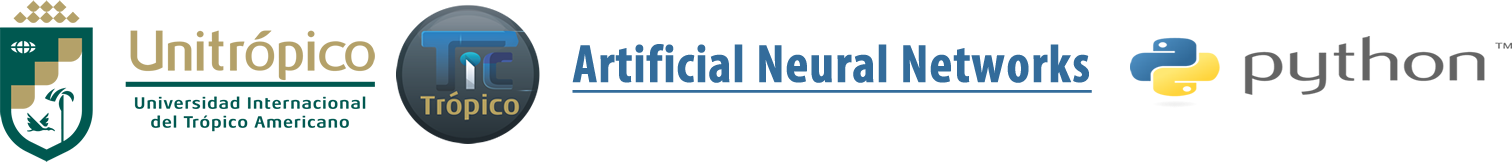

# **Neurona de McCulloch y Pitts**

[McCulloch and Pitts, 1943] propusieron el primer modelo de neurona artificial denominado TLU (Threshold Logic Unit) o LTU (Linear Threshold Unit), unidad de umbral lineal. A esta neurona artificial también se le denomina **Perceptrón.**

El modelo parte de $n$ entradas $\left(x_1, x_2, \ldots, x_j, \ldots, x_n\right)$ a la que se aplica una ponderación lineal más un umbral (que suele denominarse sesgo o bias, $b$ ):
$$
z=b+\sum_{i=1}^n w_i x_i
$$

A la que se aplica una función de activación no lineal, que en el modelo de McCulloch y Pitts es una función escalonada del tipo
$$
a=f(z) \begin{cases}1 & z \geq 0 \\ 0 & z<0\end{cases}
$$

Resultando un modelo con salida digital o binaria. Las entradas $\left(x_1, x_2, \ldots, x_j, \ldots, x_n\right)$ equivalen a las dendritas, el parámetro $b$ se denomina umbral o bias y la salida $a$ es el axón. Durante el entrenamiento se compara $a$ con los valores reales que se encuentran en $y$

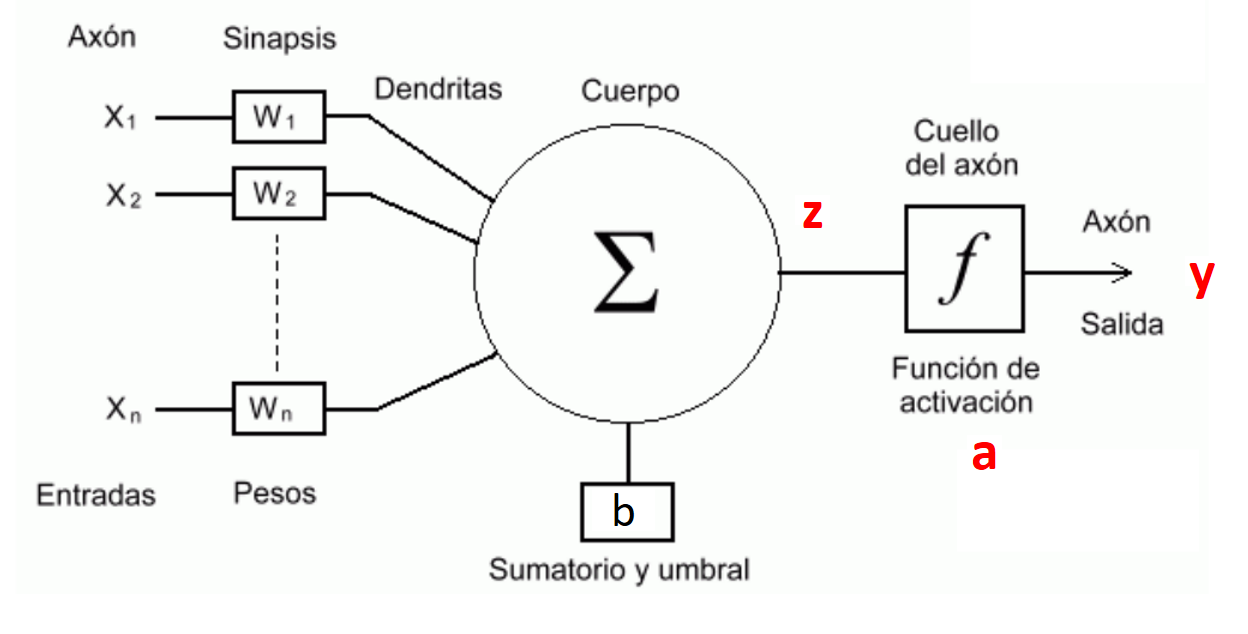

## Significado y entrenamiento

El modelo puede utilizarse como clasificador y es un dispositivo entrenable. En su definición más simple con dos neuronas de entrada resulta
$$
a=\left\{\begin{array}{lll}
1 & \text { si } & b+w_1 x_1+w_2 x_2 \geq 0 \\
0 & \text { si } & b+w_1 x_1+w_2 x_2<0
\end{array}\right.
$$
siendo $b+w_1 x_1+w_2 x_2=0$ una recta que define la región de decisión. Representa un discriminador líneal y está limitado a clasificar conjuntos de datos linealmente separables.

El entrenamiento para ajustar los pesos se basa en la regla de Hebb:
$$
\begin{gathered}
w_i(t+1)=w_i(t)+\eta \sum_{r=1}^N\left(y^r-a^r\right) x_i^r \\
b(t+1)=b(t)+\eta \sum_{r=1}^N\left(y^r-a^r\right)
\end{gathered}
$$

Siendo $y^r$ el valor real e $a^r$ el valor estimado que se corresponde con el elemento $r$ del set de entrenamiento.

La regla representa el recalculo de los pesos del perceptrón de la época o iteración de entrenamiento $t$ a la $t+1$.
En un set de entrenamiento linealmente separable converge en un tiempo finito y con independencia de los pesos de partida, si no están separados linealmente el proceso de entrenamiento oscilará. En 1969 Minsky y Papert demuestran que el perceptrón simple no puede resolver problemas no lineales

## Primeras aplicaciones del modelo de McCulloch y Pitts. Puerta lógica AND

Una de las primeras aplicaciones del modelo es resolver algunas puertas lógicas, como AND o OR. Por ejemplo la tabla de la verdad de la puerta AND es

**Cargar librerias necesarias**

In [ ]:
import pandas as pd
from IPython import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
#!pip install scikit-learn mlxtend


**Crear tabla de compuerta AND**

In [ ]:
cols = ['x1', 'x2', 'AND']
puerta_and=[[0,0,0], [0,1,0], [1,0,0], [1,1,1]]
df = pd.DataFrame(puerta_and, columns=cols)
df.head()

,x1,x2,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


Se puede adoptar una solución basada en la recta de separación $x_1+x_2=2$ tomando un valor 1 si $x_1+x_2 \geq 2$ y en caso contrario 0

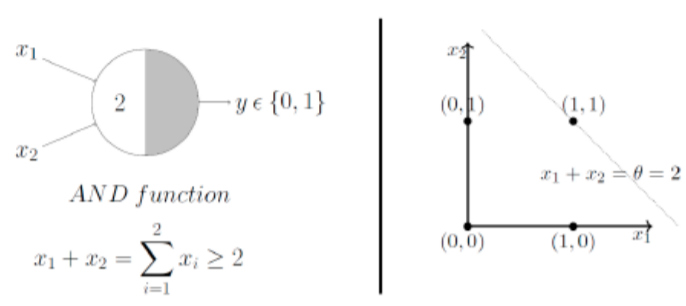

### Resolver problema a partir del preceptron

**Separar en variables de entrada y variable de salida**

In [ ]:
# Separar las características (X) y las etiquetas (y)
X = df[['x1', 'x2']].values
y = df['AND'].values

**Crear un perceptrón y ajustarlo al conjunto de datos**

In [ ]:
# Crear un perceptrón y ajustarlo al conjunto de datos
perceptron = Perceptron(eta0=0.1, random_state=50)
perceptron.fit(X, y)

Perceptron(eta0=0.1, random_state=50)

**Visualizar las dos regiones**

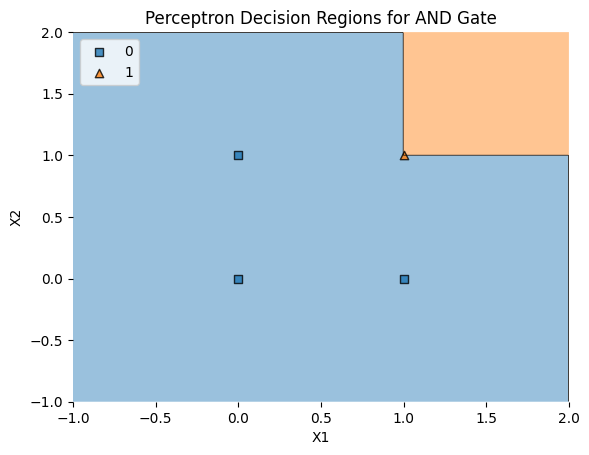

In [ ]:
# Visualizar las regiones de decisión
plot_decision_regions(X, y, clf=perceptron)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Regions for AND Gate')
plt.legend(loc='upper left')
plt.show()

### Puerta lógica OR

In [ ]:
cols = ['x1', 'x2', 'OR']
puerta_or=[[0,0,0], [0,1,1], [1,0,1], [1,1,1]]
df = pd.DataFrame(puerta_or, columns=cols)
df.head()

,x1,x2,OR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [ ]:
# Separar las características (X) y las etiquetas (y)
X = df[['x1', 'x2']].values
y = df['OR'].values

In [ ]:
# Crear un perceptrón y ajustarlo al conjunto de datos
perceptron = Perceptron(eta0=0.1, random_state=50)
perceptron.fit(X, y)

Perceptron(eta0=0.1, random_state=50)

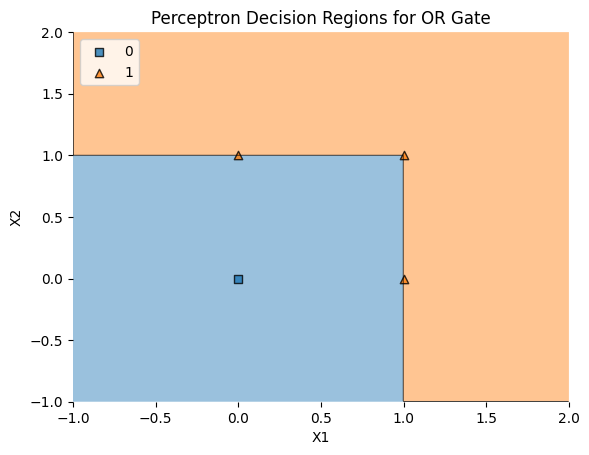

In [ ]:
# Visualizar las regiones de decisión
plot_decision_regions(X, y, clf=perceptron)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Regions for OR Gate')
plt.legend(loc='upper left')
plt.show()